In [135]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from matplotlib import pyplot as plt

Note

1. we argue the explain not forecast, hence for endog y be at t we use imformation set t 

# PREPROCESS

In [136]:
"""
read data
"""

preDf = pd.read_csv(
    r"/Users/alexlee/Documents/python/AnalyzeFinancialData/final/data3.csv"
).drop(columns=["Unnamed: 0", "Unnamed: 0.1"]).set_index("Date")
preDf = preDf.drop(
    columns=list(filter(lambda col: "change" in col, preDf.columns))
)
preDf.index.name = None
preDf.index = pd.to_datetime(preDf.index, format="%Y-%m-%d")
preDf

,boxrsa,chxrsa,daxrsa,dexrsa,lxxrsa,nyxrsa,phxrsa,sexrsa,sfxrsa,emp_rate,unemp_rate,gdp,inflation,Tech_IPO,Percentage_Tech_IPO,IPO_number
2019-01-01,217.461609,143.998485,190.731876,125.227686,282.869897,201.593907,189.062900,250.110991,263.928175,71.03175,3.85,20431.641000,252.561,1.083333,50.000000,2.166667
2019-02-01,217.335819,144.267776,191.073263,125.327061,282.438210,202.080585,189.575508,249.474275,263.543428,71.06824,3.85,20488.519000,253.319,1.083333,50.000000,2.166667
2019-03-01,218.372646,143.867535,189.867935,125.390261,281.820522,200.894474,189.606676,248.348096,263.790054,71.05563,3.85,20545.397000,254.277,1.083333,50.000000,2.166667
2019-04-01,219.646361,144.168175,189.715263,125.840163,282.870989,200.654031,190.048450,247.328551,265.052762,71.13650,3.85,20602.275000,255.233,1.083333,50.000000,2.166667
2019-05-01,219.963661,144.095882,189.761399,126.570518,284.199509,200.671341,190.484645,247.794303,265.101276,71.14388,3.85,20682.624000,255.296,1.083333,50.000000,2.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-01,332.422814,205.770844,296.144484,186.299633,437.436247,308.904374,324.997887,382.217570,355.460454,71.86066,4.00,23278.181667,313.225,0.222222,7.142857,3.111111
2024-06-01,333.769806,206.205799,295.967387,187.230041,439.757323,311.131293,324.348280,385.679277,357.675676,71.80083,4.10,23332.457333,313.049,0.222222,7.142857,3.111111
2024-07-01,334.540116,207.036537,296.223465,188.013742,440.347076,312.705366,324.908968,389.293551,356.656879,71.79679,4.30,23386.733000,313.534,0.222222,7.142857,3.111111
2024-08-01,335.294871,208.636480,296.636627,188.664160,440.618527,313.744669,324.400323,392.519446,357.662571,71.73347,4.20,23386.733000,314.121,0.222222,7.142857,3.111111


In [137]:
"""
ADF test suggest variable in df be non-stataionary
"""

print("we consider ADF under level alpha be 0.05")
for col in preDf.columns:
    result = adfuller(preDf[col])

    print(f"\nfor {col}, \np_value be {result[1]:.4f}:" )
    if result[1] < 0.05:
        print("The series is stationary.")
    else:
        print("The series is non-stationary.")

we consider ADF under level alpha be 0.05

for boxrsa, 
p_value be 0.5943:
The series is non-stationary.

for chxrsa, 
p_value be 0.9710:
The series is non-stationary.

for daxrsa, 
p_value be 0.7049:
The series is non-stationary.

for dexrsa, 
p_value be 0.9311:
The series is non-stationary.

for lxxrsa, 
p_value be 0.6881:
The series is non-stationary.

for nyxrsa, 
p_value be 0.9636:
The series is non-stationary.

for phxrsa, 
p_value be 0.5123:
The series is non-stationary.

for sexrsa, 
p_value be 0.6424:
The series is non-stationary.

for sfxrsa, 
p_value be 0.5366:
The series is non-stationary.

for emp_rate, 
p_value be 0.1279:
The series is non-stationary.

for unemp_rate, 
p_value be 0.0972:
The series is non-stationary.

for gdp, 
p_value be 0.9347:
The series is non-stationary.

for inflation, 
p_value be 0.9500:
The series is non-stationary.

for Tech_IPO, 
p_value be 0.7418:
The series is non-stationary.

for Percentage_Tech_IPO, 
p_value be 0.7933:
The series is non-stat

In [138]:
"""
take differential, then test again
"""
df = pd.DataFrame(
    index=preDf.index[1:]
)
for col in preDf.columns:
    df[f"{col}_bp"] = np.round(preDf[col].pct_change()*10000, 2)[1:]


print("we consider ADF under level alpha be 0.10")
for col in df.columns:
    result = adfuller(df[col])


    print(f"\nfor {col}, \np_value be {result[1]:.4f}:" )
    if result[1] < 0.1:
        print("The series is stationary.")
    else:
        print("The series is non-stationary.")

we consider ADF under level alpha be 0.10

for boxrsa_bp, 
p_value be 0.0344:
The series is stationary.

for chxrsa_bp, 
p_value be 0.0755:
The series is stationary.

for daxrsa_bp, 
p_value be 0.0773:
The series is stationary.

for dexrsa_bp, 
p_value be 0.0179:
The series is stationary.

for lxxrsa_bp, 
p_value be 0.0474:
The series is stationary.

for nyxrsa_bp, 
p_value be 0.0064:
The series is stationary.

for phxrsa_bp, 
p_value be 0.1784:
The series is non-stationary.

for sexrsa_bp, 
p_value be 0.0125:
The series is stationary.

for sfxrsa_bp, 
p_value be 0.0347:
The series is stationary.

for emp_rate_bp, 
p_value be 0.0000:
The series is stationary.

for unemp_rate_bp, 
p_value be 0.0000:
The series is stationary.

for gdp_bp, 
p_value be 0.0426:
The series is stationary.

for inflation_bp, 
p_value be 0.0816:
The series is stationary.

for Tech_IPO_bp, 
p_value be 0.0000:
The series is stationary.

for Percentage_Tech_IPO_bp, 
p_value be 0.0000:
The series is stationary.

fo

# PREVIEW

In [139]:
df.describe()

,boxrsa_bp,chxrsa_bp,daxrsa_bp,dexrsa_bp,lxxrsa_bp,nyxrsa_bp,phxrsa_bp,sexrsa_bp,sfxrsa_bp,emp_rate_bp,unemp_rate_bp,gdp_bp,inflation_bp,Tech_IPO_bp,Percentage_Tech_IPO_bp,IPO_number_bp
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,64.145882,55.491765,66.038235,61.574412,65.398529,65.930147,81.592206,68.381324,45.452206,3.803088,197.159559,20.217500,32.443824,-60.603676,-89.420735,60.888382
std,66.820823,50.967823,101.600201,57.504286,82.076440,63.077670,116.256731,118.491584,113.769408,196.453921,2945.283946,81.941366,31.888554,1415.095764,1387.877066,426.563055
min,-108.050000,-58.660000,-140.910000,-67.000000,-158.510000,-58.690000,-228.590000,-266.970000,-313.100000,-1466.950000,-1764.710000,-278.310000,-78.400000,-7948.720000,-8461.540000,-689.660000
25%,15.897500,17.395000,-6.202500,14.437500,12.207500,10.055000,9.860000,-3.860000,1.255000,-2.647500,-340.757500,18.485000,14.825000,0.000000,0.000000,0.000000
50%,58.510000,64.560000,33.460000,55.710000,62.285000,78.215000,69.170000,79.590000,43.180000,10.175000,-73.530000,24.600000,29.620000,0.000000,0.000000,0.000000
75%,110.410000,92.882500,148.285000,117.110000,128.800000,105.727500,187.542500,160.292500,99.592500,24.327500,0.000000,35.932500,46.170000,0.000000,0.000000,0.000000
max,217.120000,159.640000,309.030000,193.670000,273.490000,211.540000,337.690000,307.640000,299.590000,409.400000,23636.360000,261.010000,124.830000,6250.000000,5669.640000,3333.330000


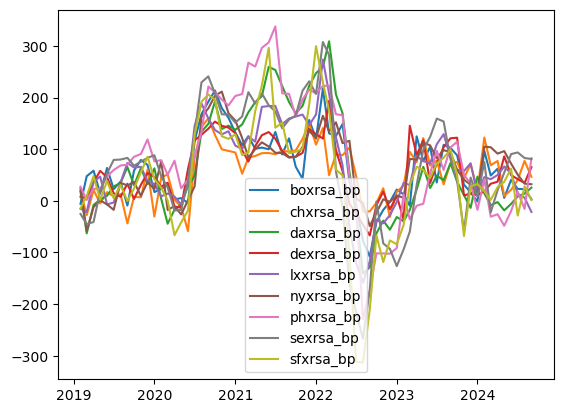

In [140]:
tempCols = list(filter(lambda col: "xrsa" in col, df.columns))
for col in tempCols:
    plt.plot(df[col])
plt.legend(tempCols)
plt.show()

# BENCH MODEL

In [141]:
def model(y, x):
    result = sm.OLS(
        endog=y,
        exog=x
    ).fit()
    display(result.summary2().tables[1].round(2))
    plt.plot(y)
    plt.plot(result.predict(x))
    
    plt.legend(["true", "estimate"])
    plt.show()
    print(f"r^2 = {result.rsquared_adj:.4f}")
    print("\n\n")
    # return result

In [142]:
"""
we add pre, at, and after covid dummy
"""

df["preDummy"] = [1 if date.year in [2019, 2020] else 0 for date in df.index]
df["atDummy"] = [1 if date.year in [2021,2022] else 0 for date in df.index]
df["postDummy"] = [1 if date.year in [2023, 2024] else 0 for date in df.index]

df["time"] = list(range(1, df.shape[0]+1))

endogCols = list(filter(lambda col: "xrsa" in col, df.columns))
exogCols = df.columns[~df.columns.isin(endogCols)].to_list()
print(f"endogs or y be {endogCols}")
print(f"exogs or x be {exogCols}")

endogs or y be ['boxrsa_bp', 'chxrsa_bp', 'daxrsa_bp', 'dexrsa_bp', 'lxxrsa_bp', 'nyxrsa_bp', 'phxrsa_bp', 'sexrsa_bp', 'sfxrsa_bp']
exogs or x be ['emp_rate_bp', 'unemp_rate_bp', 'gdp_bp', 'inflation_bp', 'Tech_IPO_bp', 'Percentage_Tech_IPO_bp', 'IPO_number_bp', 'preDummy', 'atDummy', 'postDummy', 'time']


model 1-1: macro variables


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,28.68,13.94,2.06,0.04,0.83,56.53
emp_rate_bp,-0.00,0.20,-0.01,0.99,-0.40,0.40
unemp_rate_bp,0.00,0.01,0.03,0.98,-0.02,0.02
gdp_bp,-0.07,0.16,-0.43,0.67,-0.38,0.25
inflation_bp,1.12,0.32,3.55,0.00,0.49,1.75


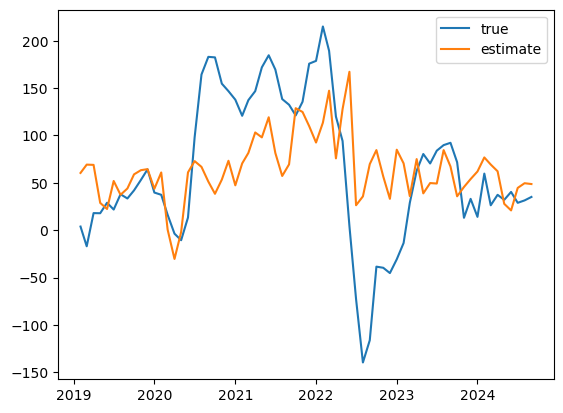

r^2 = 0.1429





model 1-2: macro varaible + covid, w dummy no constant


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
emp_rate_bp,-0.07,0.21,-0.32,0.75,-0.48,0.35
unemp_rate_bp,-0.00,0.01,-0.29,0.77,-0.03,0.02
gdp_bp,-0.04,0.16,-0.25,0.81,-0.36,0.28
inflation_bp,1.15,0.37,3.09,0.00,0.41,1.90
preDummy,41.70,17.93,2.33,0.02,5.85,77.54
atDummy,26.66,24.67,1.08,0.28,-22.68,75.99
postDummy,15.09,18.23,0.83,0.41,-21.36,51.53


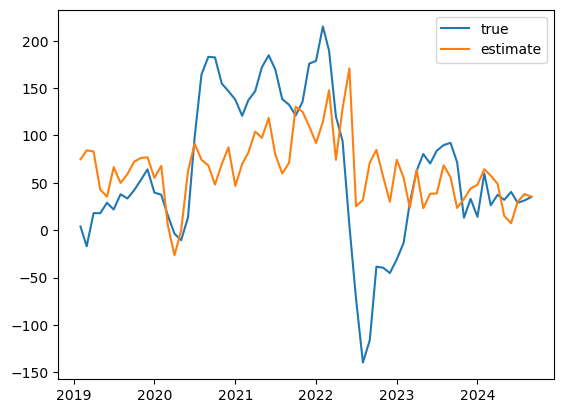

r^2 = 0.1344





In [143]:
"""
we add following variable
    pre, at, and after covid
Consider following models,
    model 1-1: macro variables
    model 1-2: macro varaible + covid, w dummy no constant
"""

# model 1-1
print("model 1-1: macro variables")
exogCols = ['emp_rate_bp', 'unemp_rate_bp', 'gdp_bp', 'inflation_bp']
model(
    y=df[endogCols].mean(axis=1),
    x=sm.add_constant(df[exogCols])
)

# model 1-2
print("\n\nmodel 1-2: macro varaible + covid, w dummy no constant")
exogCols = ['emp_rate_bp', 'unemp_rate_bp', 'gdp_bp', 'inflation_bp', 'preDummy', 'atDummy', 'postDummy']
model(
    y=df[endogCols].mean(axis=1),
    x=df[exogCols]
)



# MODEL

Selected as Top Tech Concentration Areas for Remote-Work-Friendly Tech

	1.	San Francisco (sf):
	•	Many companies headquartered in San Francisco, like Google, Meta, and Salesforce, support remote work for software developers, product managers, and designers.
	•	Strong presence of startups and enterprises in cloud computing, software-as-a-service (SaaS), and collaborative tools (e.g., Slack, Zoom).
	•	Widespread adoption of hybrid or fully remote work policies post-pandemic.

	2.	Seattle (se):
	•	Amazon and Microsoft offer significant opportunities for remote work in software engineering, cloud solutions, and AI.
	•	High concentration of remote-friendly roles in cloud infrastructure (e.g., Azure, AWS).
	•	Growth of smaller tech companies in the Seattle area that are remote-first.

	3.	New York (ny):
	•	Strong presence in fintech, which has embraced remote work for developers, data analysts, and product managers.
	•	Companies like Google and IBM maintain offices here but support remote or hybrid work.
	•	Media and ad-tech sectors based in New York heavily invest in remote-friendly roles.

	4.	Los Angeles (lx):
	•	Growing focus on creative tech and entertainment tech industries, which increasingly rely on remote collaboration tools.
	•	Gaming companies (e.g., Riot Games) offer remote or hybrid work opportunities.
	•	Emphasis on remote-friendly tech sectors such as virtual reality (VR) and content production.

	5.	Denver (de):
	•	Emerging as a remote-work-friendly hub due to its focus on startups in software development, cloud computing, and outdoor tech.
	•	Attracts workers from tech hubs who relocate for a better quality of life while maintaining remote roles.

Excluded from Top Remote-Work-Friendly Tech Areas

	1.	Boston (bo):
	•	Tech roles in Boston are concentrated in biotech and health tech, which often require on-site work (e.g., lab research and clinical trials).
	•	Fewer software-focused companies compared to other hubs.

	2.	Chicago (ch):
	•	Dominated by fintech and logistics tech, which are less remote-friendly compared to industries like SaaS or cloud computing.
	•	Fewer large tech companies with established remote work policies.

	3.	Dallas (da):
	•	Strong presence in telecommunications and defense tech, industries that typically require on-site or secure environments.
	•	Fewer remote-first companies compared to other regions.

	4.	Phoenix (ph):
	•	Significant tech presence in semiconductors (e.g., Intel) and data centers, which often require on-site work.
	•	Growing software sector, but remote opportunities are not as abundant as in Denver or Los Angeles.



In [144]:
def model_seperate(df, exogCols, addConstant):
    global techCols, nonTechCols
    print("for tech")
    y = df[techCols].mean(axis=1)
    x =  df[exogCols] if addConstant == False else sm.add_constant(df[exogCols])
    result_tech = sm.OLS(
        endog=y,
        exog=x
    ).fit()
    display(result_tech.summary2().tables[1].round(2))
    print(f"r^2 = {result_tech.rsquared:.4f}")
    plt.plot(y)
    plt.plot(result_tech.predict(x))
    print("\n\n")


    print("for non-tech")
    y = df[nonTechCols].mean(axis=1)
    x =  df[exogCols] if addConstant == False else sm.add_constant(df[exogCols])
    result_nonTech = sm.OLS(
        endog=y,
        exog=x
    ).fit()
    display(result_nonTech.summary2().tables[1].round(2))
    print(f"r^2 = {result_nonTech.rsquared_adj:.4f}")

    plt.plot(y)
    plt.plot(result_nonTech.predict(x))

    plt.legend(["true_tech", "estimate_tech", "true_nonTech", "estimate_nonTech"])
    plt.show()
print("\n\n")

In [145]:
"""
We asked chatGPT co classified regions to high tech area and low tech area by fundamental industries perspective, having
    1. tech: San Francisco (sf), Seattle (se), New York (ny), Los Angeles (lx), Denver (de)
    2. non tech: Boston (bo), Chicago (ch), Dallas (da), Phoenix (ph)
"""

'\nWe asked chatGPT co classified regions to high tech area and low tech area by fundamental industries perspective, having\n    1. tech: San Francisco (sf), Seattle (se), New York (ny), Los Angeles (lx), Denver (de)\n    2. non tech: Boston (bo), Chicago (ch), Dallas (da), Phoenix (ph)\n'

model 2-1: macro variables + tech


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,29.34,14.15,2.07,0.04,1.03,57.65
emp_rate_bp,-0.02,0.20,-0.08,0.93,-0.41,0.38
unemp_rate_bp,-0.00,0.01,-0.05,0.96,-0.02,0.02
gdp_bp,-0.05,0.16,-0.30,0.76,-0.36,0.27
inflation_bp,1.09,0.31,3.47,0.00,0.46,1.72
Tech_IPO_bp,0.11,0.12,0.93,0.36,-0.13,0.36
Percentage_Tech_IPO_bp,-0.13,0.13,-1.01,0.32,-0.39,0.13
IPO_number_bp,-0.08,0.05,-1.59,0.12,-0.18,0.02


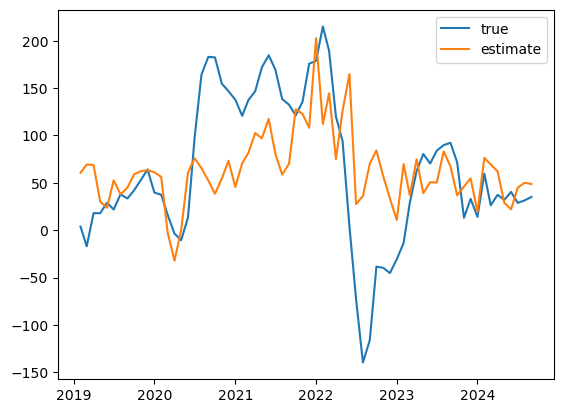

r^2 = 0.1561





model 2-2: macro variables + COVID + tech


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
emp_rate_bp,-0.08,0.21,-0.37,0.71,-0.49,0.34
unemp_rate_bp,-0.00,0.01,-0.32,0.75,-0.03,0.02
gdp_bp,-0.03,0.16,-0.16,0.87,-0.34,0.29
inflation_bp,1.19,0.37,3.20,0.00,0.45,1.94
Tech_IPO_bp,0.10,0.12,0.83,0.41,-0.14,0.35
Percentage_Tech_IPO_bp,-0.12,0.13,-0.92,0.36,-0.39,0.14
IPO_number_bp,-0.07,0.05,-1.44,0.15,-0.18,0.03
preDummy,40.48,18.22,2.22,0.03,4.00,76.95
atDummy,19.82,25.00,0.79,0.43,-30.22,69.86
postDummy,19.13,18.56,1.03,0.31,-18.01,56.28


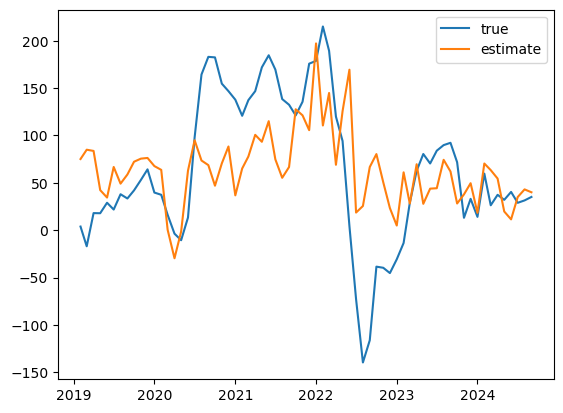

r^2 = 0.1423





In [146]:
"""
we add the TECH factors, namely
    1. Tech_IPO
    2. Percentage_Tech_IPO
    3. IPO_number
Consider the model
    model 2-1: macro varaible + tech
    model 2-2: macro varaible + COVID + tech

"""

print("model 2-1: macro variables + tech")
exogCols = ['emp_rate_bp', 'unemp_rate_bp', 'gdp_bp', 'inflation_bp', 'Tech_IPO_bp', 'Percentage_Tech_IPO_bp', 'IPO_number_bp']
model(
    y=df[endogCols].mean(axis=1),
    x=sm.add_constant(df[exogCols])
)
print("\n\nmodel 2-2: macro variables + COVID + tech")
exogCols = ['emp_rate_bp', 'unemp_rate_bp', 'gdp_bp', 'inflation_bp', 'Tech_IPO_bp', 'Percentage_Tech_IPO_bp', 'IPO_number_bp', 'preDummy', 'atDummy', 'postDummy']
model(
    y=df[endogCols].mean(axis=1),
    x=df[exogCols]
)

model 3-1: macro variables
for tech


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,29.97,14.94,2.01,0.05,0.12,59.82
emp_rate_bp,0.01,0.21,0.05,0.96,-0.42,0.44
unemp_rate_bp,0.00,0.01,0.01,1.00,-0.03,0.03
gdp_bp,-0.06,0.17,-0.36,0.72,-0.40,0.28
inflation_bp,1.00,0.34,2.96,0.00,0.33,1.68


r^2 = 0.1522



for non-tech


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,27.06,13.50,2.00,0.05,0.07,54.04
emp_rate_bp,-0.02,0.19,-0.09,0.93,-0.40,0.37
unemp_rate_bp,0.00,0.01,0.05,0.96,-0.02,0.02
gdp_bp,-0.08,0.15,-0.50,0.62,-0.38,0.23
inflation_bp,1.27,0.31,4.15,0.00,0.66,1.88


r^2 = 0.1892


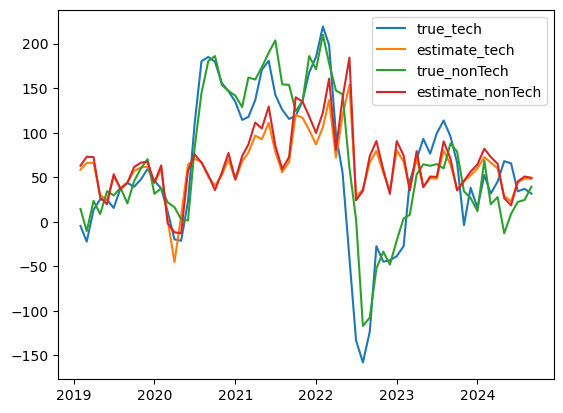



model 3-2: macro variable + tech factor
for tech


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,30.37,15.16,2.00,0.05,0.04,60.71
emp_rate_bp,-0.01,0.21,-0.03,0.98,-0.43,0.42
unemp_rate_bp,-0.00,0.01,-0.07,0.94,-0.03,0.03
gdp_bp,-0.04,0.17,-0.22,0.82,-0.37,0.30
inflation_bp,0.97,0.34,2.89,0.01,0.30,1.65
Tech_IPO_bp,0.13,0.13,0.99,0.32,-0.13,0.39
Percentage_Tech_IPO_bp,-0.15,0.14,-1.08,0.28,-0.43,0.13
IPO_number_bp,-0.09,0.05,-1.62,0.11,-0.19,0.02


r^2 = 0.2057



for non-tech


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,28.05,13.77,2.04,0.05,0.50,55.59
emp_rate_bp,-0.03,0.19,-0.15,0.88,-0.41,0.36
unemp_rate_bp,-0.00,0.01,-0.01,0.99,-0.02,0.02
gdp_bp,-0.06,0.15,-0.40,0.69,-0.36,0.24
inflation_bp,1.24,0.31,4.06,0.00,0.63,1.85
Tech_IPO_bp,0.09,0.12,0.78,0.44,-0.14,0.33
Percentage_Tech_IPO_bp,-0.11,0.13,-0.85,0.40,-0.36,0.15
IPO_number_bp,-0.07,0.05,-1.44,0.15,-0.17,0.03


r^2 = 0.1951


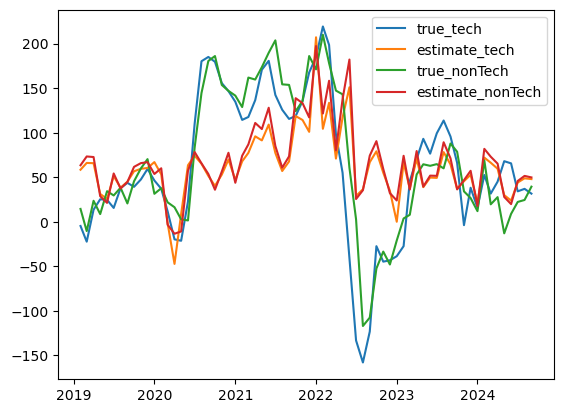



model 3-3: macro variable + covid + tech factor, w dummy no constant
for tech


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
emp_rate_bp,-0.07,0.22,-0.30,0.77,-0.51,0.38
unemp_rate_bp,-0.00,0.01,-0.29,0.77,-0.03,0.02
gdp_bp,-0.02,0.17,-0.13,0.90,-0.36,0.32
inflation_bp,1.21,0.40,3.04,0.00,0.41,2.01
Tech_IPO_bp,0.13,0.13,1.01,0.32,-0.13,0.40
Percentage_Tech_IPO_bp,-0.16,0.14,-1.10,0.27,-0.44,0.13
IPO_number_bp,-0.09,0.06,-1.65,0.10,-0.20,0.02
preDummy,39.20,19.45,2.02,0.05,0.27,78.13
atDummy,5.99,26.68,0.22,0.82,-47.42,59.40
postDummy,25.20,19.80,1.27,0.21,-14.44,64.84


r^2 = 0.2258



for non-tech


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
emp_rate_bp,-0.09,0.20,-0.46,0.65,-0.49,0.31
unemp_rate_bp,-0.00,0.01,-0.35,0.73,-0.03,0.02
gdp_bp,-0.03,0.15,-0.20,0.84,-0.34,0.28
inflation_bp,1.17,0.36,3.25,0.00,0.45,1.89
Tech_IPO_bp,0.06,0.12,0.54,0.59,-0.17,0.30
Percentage_Tech_IPO_bp,-0.08,0.13,-0.61,0.54,-0.34,0.18
IPO_number_bp,-0.05,0.05,-1.08,0.28,-0.15,0.05
preDummy,42.07,17.56,2.40,0.02,6.92,77.22
atDummy,37.11,24.09,1.54,0.13,-11.12,85.33
postDummy,11.55,17.88,0.65,0.52,-24.24,47.35


r^2 = 0.1976


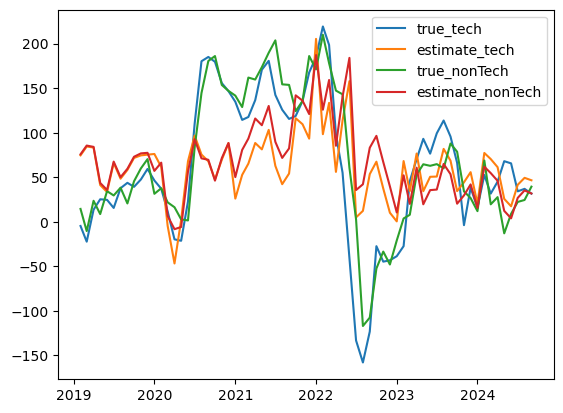

In [147]:
"""
Consider tech and nontech seperately for 
    model 3-1: macro variables
    model 3-2: macro variable + tech factor
    model 3-3: macro variable + covid + tech factor, w dummy no constant
"""

techCols = ['dexrsa_bp', 'lxxrsa_bp', 'nyxrsa_bp', 'sexrsa_bp', 'sfxrsa_bp']
nonTechCols = ['boxrsa_bp', 'chxrsa_bp', 'daxrsa_bp', 'phxrsa_bp']

# model 1
print("model 3-1: macro variables")
model_seperate(
    df = df,
    exogCols=['emp_rate_bp', 'unemp_rate_bp', 'gdp_bp', 'inflation_bp'],
    addConstant=True
)
# model 2
print("\n\nmodel 3-2: macro variable + tech factor")
model_seperate(
    df = df,
    exogCols=['emp_rate_bp', 'unemp_rate_bp', 'gdp_bp', 'inflation_bp', 'Tech_IPO_bp', 'Percentage_Tech_IPO_bp', 'IPO_number_bp'],
    addConstant=True
)
# model 3
print("\n\nmodel 3-3: macro variable + covid + tech factor, w dummy no constant")
model_seperate(
    df = df,
    exogCols=['emp_rate_bp', 'unemp_rate_bp', 'gdp_bp', 'inflation_bp', 'Tech_IPO_bp', 'Percentage_Tech_IPO_bp', 'IPO_number_bp', 'preDummy', 'atDummy', 'postDummy'],
    addConstant=False
)



for pre covid
for tech


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
emp_rate_bp,0.10,0.23,0.44,0.67,-0.38,0.58
unemp_rate_bp,0.01,0.01,0.75,0.46,-0.02,0.04
gdp_bp,-0.13,0.19,-0.69,0.50,-0.52,0.27
inflation_bp,2.07,0.65,3.20,0.00,0.71,3.43
Tech_IPO_bp,0.01,0.03,0.22,0.83,-0.06,0.08
Percentage_Tech_IPO_bp,0.00,0.02,0.22,0.83,-0.03,0.04
IPO_number_bp,0.00,0.02,0.22,0.83,-0.03,0.04


r^2 = 0.4005



for non-tech


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
emp_rate_bp,0.11,0.22,0.50,0.63,-0.36,0.58
unemp_rate_bp,0.01,0.01,0.92,0.37,-0.02,0.04
gdp_bp,-0.15,0.18,-0.81,0.43,-0.53,0.23
inflation_bp,2.01,0.62,3.21,0.00,0.69,3.32
Tech_IPO_bp,0.00,0.03,0.03,0.98,-0.07,0.07
Percentage_Tech_IPO_bp,0.00,0.02,0.03,0.98,-0.03,0.03
IPO_number_bp,0.00,0.02,0.03,0.98,-0.03,0.04


r^2 = 0.2161


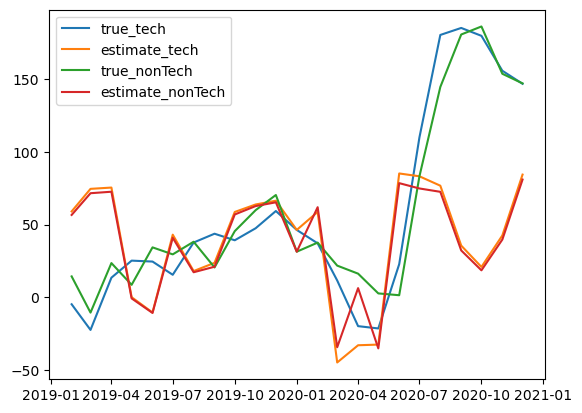



for at covid
for tech


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
emp_rate_bp,0.95,1.11,0.85,0.41,-1.39,3.28
unemp_rate_bp,-0.06,0.08,-0.72,0.48,-0.23,0.11
gdp_bp,-0.50,0.77,-0.65,0.53,-2.12,1.12
inflation_bp,1.00,0.45,2.22,0.04,0.05,1.95
Tech_IPO_bp,0.16,0.15,1.01,0.33,-0.17,0.48
Percentage_Tech_IPO_bp,-0.23,0.20,-1.16,0.26,-0.65,0.19
IPO_number_bp,0.25,0.23,1.09,0.29,-0.23,0.73


r^2 = 0.6219



for non-tech


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
emp_rate_bp,0.77,0.98,0.79,0.44,-1.29,2.84
unemp_rate_bp,-0.07,0.07,-0.94,0.36,-0.22,0.08
gdp_bp,0.02,0.68,0.04,0.97,-1.41,1.46
inflation_bp,1.19,0.40,2.98,0.01,0.35,2.03
Tech_IPO_bp,0.12,0.14,0.90,0.38,-0.16,0.41
Percentage_Tech_IPO_bp,-0.19,0.18,-1.05,0.31,-0.56,0.19
IPO_number_bp,0.20,0.20,0.98,0.34,-0.23,0.62


r^2 = 0.6553


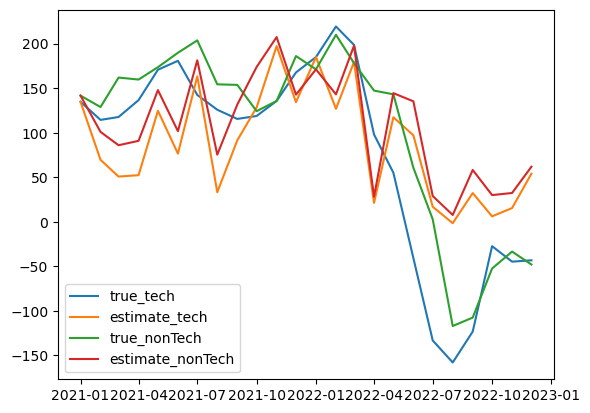



for post covid
for tech


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
emp_rate_bp,-0.33,0.50,-0.66,0.52,-1.40,0.74
unemp_rate_bp,-0.01,0.02,-0.36,0.73,-0.05,0.03
gdp_bp,2.26,0.50,4.52,0.00,1.20,3.33
inflation_bp,0.20,0.43,0.46,0.65,-0.73,1.12
Tech_IPO_bp,-0.01,0.00,-2.73,0.02,-0.02,-0.00
Percentage_Tech_IPO_bp,-0.00,0.00,-0.23,0.82,-0.00,0.00
IPO_number_bp,-0.04,0.02,-2.36,0.03,-0.07,-0.00


r^2 = 0.8125



for non-tech


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
emp_rate_bp,-0.14,0.41,-0.35,0.73,-1.02,0.73
unemp_rate_bp,-0.01,0.02,-0.83,0.42,-0.05,0.02
gdp_bp,1.13,0.41,2.76,0.01,0.26,2.00
inflation_bp,0.70,0.36,1.96,0.07,-0.06,1.45
Tech_IPO_bp,-0.01,0.00,-2.92,0.01,-0.02,-0.00
Percentage_Tech_IPO_bp,0.00,0.00,0.13,0.90,-0.00,0.00
IPO_number_bp,-0.03,0.01,-2.66,0.02,-0.06,-0.01


r^2 = 0.6790


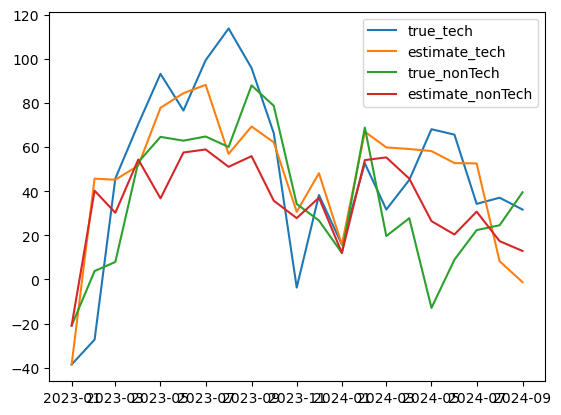

In [148]:
"""
Consider pre, at, post covid seperately for 
    modol4: macro variable + tech factor, w dummy no constant
"""
print("for pre covid")
model_seperate(
    df = df[df["preDummy"] == 1],
    exogCols=['emp_rate_bp', 'unemp_rate_bp', 'gdp_bp', 'inflation_bp', 'Tech_IPO_bp', 'Percentage_Tech_IPO_bp', 'IPO_number_bp'],
    addConstant=False
)

print("\n\nfor at covid")
model_seperate(
    df = df[df["atDummy"] == 1],
    exogCols=['emp_rate_bp', 'unemp_rate_bp', 'gdp_bp', 'inflation_bp', 'Tech_IPO_bp', 'Percentage_Tech_IPO_bp', 'IPO_number_bp'],
    addConstant=False
)

print("\n\nfor post covid")
model_seperate(
    df = df[df["postDummy"] == 1],
    exogCols=['emp_rate_bp', 'unemp_rate_bp', 'gdp_bp', 'inflation_bp', 'Tech_IPO_bp', 'Percentage_Tech_IPO_bp', 'IPO_number_bp'],
    addConstant=False
)


# CONCLUSION

Setup
    1. All our model be OLS
    3. ALl variable be in percentage change and pass ADF test with a level alpha = 0.05, suggest they are stationary.
    2. we value model by addjusted Rsquare
    4. We focus on the simultaneous relationship i.e. the correlation instead of trying to forecast. Hence for endogenous variable at t, our information set be t not t-1

We tried to argue,
    1. Addition to macro variables, can COVID variable explain more real estate price? (model 1-1 to 1-2)
    2. Addition to macro variables (and even COVID variable ) , can the tech varibles explain more real estate price? (model 2-1, 2-2)
    3. Classiy data to 'tech' and 'non-tech', can tech variable perform better i.e. larger coeffi. or more significant? (model 3-1. 3-2. 3-3)
    4. Classiy data to 'pre covid', 'at covid' and 'post covid', can tech variable perform better i.e. larger coeffi. or more significant? (model 4)

The data suggest that
    1. No. The adj_R^2 be drops from .1429 to .1344
    2. Yes. Explain more if condition macro (.1429 to .1561) but remain same if added COVID (.1344 to .1423)
    3. Partially. The macro + COVID + tech model has a .2258 in tech area and .1976 in non-tech area, while other model remain nearly the same.
    4. Yes. In pre COVID macro + tech model has a .4005 while macro model has .2161. In the post COVID the number will be .8125 and .6790. While the at COVID has similar result
    
We find out some interesting point,
    1. Inflation be significant almost across all model 
    2. In mostly all model, Tech IPO has a positive coeffi., while Tech IPO percent and IPO number has negative coeffi.
    3. At covid period real estate price drop signicantly and price sort of bounced back in the post period.

We acknowledge that
    1. small sample size
    2. most variable are not significant